In [1]:
import scipy.io as sio
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
d_file = 'SC46.mat'
h_file = 'SC67.mat'
disease = sio.loadmat(d_file)['data_d_selected']
healthy = sio.loadmat(h_file)['data_h_selected']


In [5]:
## MiniBatchKMeans
mbkmeans = MiniBatchKMeans(n_clusters=2, random_state=1, batch_size=4096)
d_idx_mbk = mbkmeans.fit_predict(disease)
h_idx_mbk = mbkmeans.predict(healthy)
print(' Mini Batch KMeans: ', sum(h_idx_mbk == 0)/len(h_idx_mbk))

 Mini Batch KMeans:  0.9491967452534947


In [6]:
d_onpaper = sio.loadmat('SC46_onpaper.mat')['data_selected']
d_o_idxmbk = mbkmeans.predict(d_onpaper)
print('---------------------')
print('mini-batch KMeans:', d_o_idxmbk)

---------------------
mini-batch KMeans: [0 0 1 0 0 0 0 0 0 0 0 0 0]


In [11]:
X_embedded = TSNE(n_components=2, learning_rate=1e5, init='random',verbose=True, random_state = 100).fit_transform(disease)
# tsne = TSNE(n_components=2, random_state=20, verbose=1, perplexity=50, learning_rate=1e4, early_exaggeration=40, n_iter=4000)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18415 samples in 0.030s...
[t-SNE] Computed neighbors for 18415 samples in 0.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18415
[t-SNE] Computed conditional probabilities for sample 2000 / 18415
[t-SNE] Computed conditional probabilities for sample 3000 / 18415
[t-SNE] Computed conditional probabilities for sample 4000 / 18415
[t-SNE] Computed conditional probabilities for sample 5000 / 18415
[t-SNE] Computed conditional probabilities for sample 6000 / 18415
[t-SNE] Computed conditional probabilities for sample 7000 / 18415
[t-SNE] Computed conditional probabilities for sample 8000 / 18415
[t-SNE] Computed conditional probabilities for sample 9000 / 18415
[t-SNE] Computed conditional probabilities for sample 10000 / 18415
[t-SNE] Computed conditional probabilities for sample 11000 / 18415
[t-SNE] Computed conditional probabilities for sample 12000 / 18415
[t-SNE] Computed conditional probabilities for sam

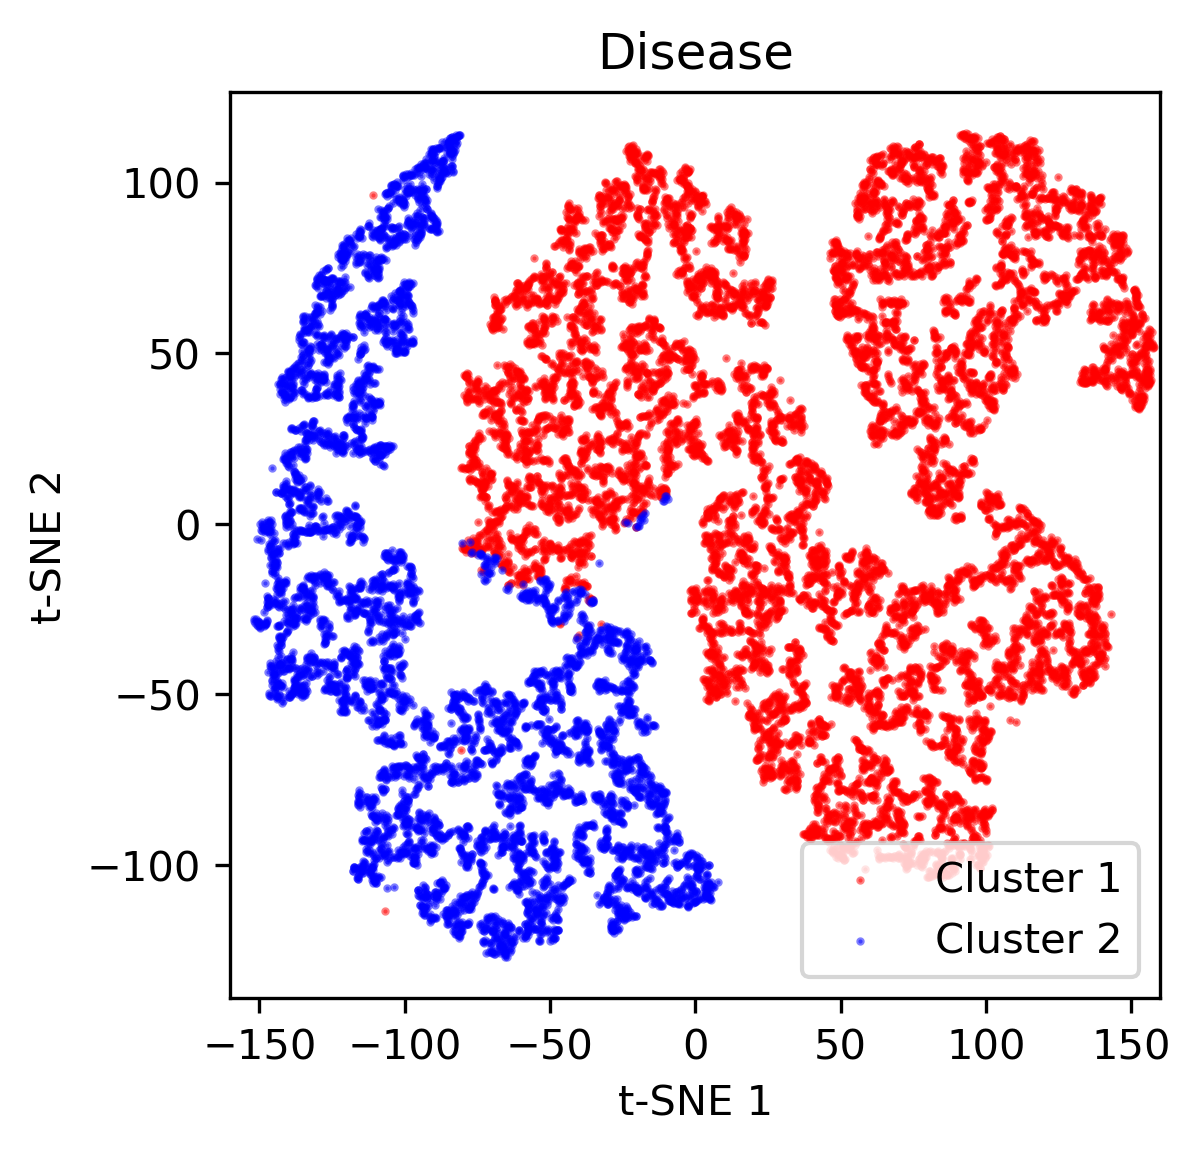

In [28]:
my_dpi = 300
plt.figure(figsize=(4, 4), dpi=my_dpi)
plt.scatter(X_embedded[d_idx_mbk == 0, 0], X_embedded[d_idx_mbk == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_embedded[d_idx_mbk == 1, 0], X_embedded[d_idx_mbk == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Disease')
plt.legend()
plt.xlim([-160, 160])
plt.savefig('disease.png', dpi=my_dpi * 10)
plt.show()


In [20]:
X_healthy = TSNE(n_components=2, learning_rate=1e4, init='random',verbose=True, random_state = 100).fit_transform(healthy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9586 samples in 0.016s...
[t-SNE] Computed neighbors for 9586 samples in 0.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9586
[t-SNE] Computed conditional probabilities for sample 2000 / 9586
[t-SNE] Computed conditional probabilities for sample 3000 / 9586
[t-SNE] Computed conditional probabilities for sample 4000 / 9586
[t-SNE] Computed conditional probabilities for sample 5000 / 9586
[t-SNE] Computed conditional probabilities for sample 6000 / 9586
[t-SNE] Computed conditional probabilities for sample 7000 / 9586
[t-SNE] Computed conditional probabilities for sample 8000 / 9586
[t-SNE] Computed conditional probabilities for sample 9000 / 9586
[t-SNE] Computed conditional probabilities for sample 9586 / 9586
[t-SNE] Mean sigma: 103.335357
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.110107
[t-SNE] KL divergence after 1000 iterations: 1.021257


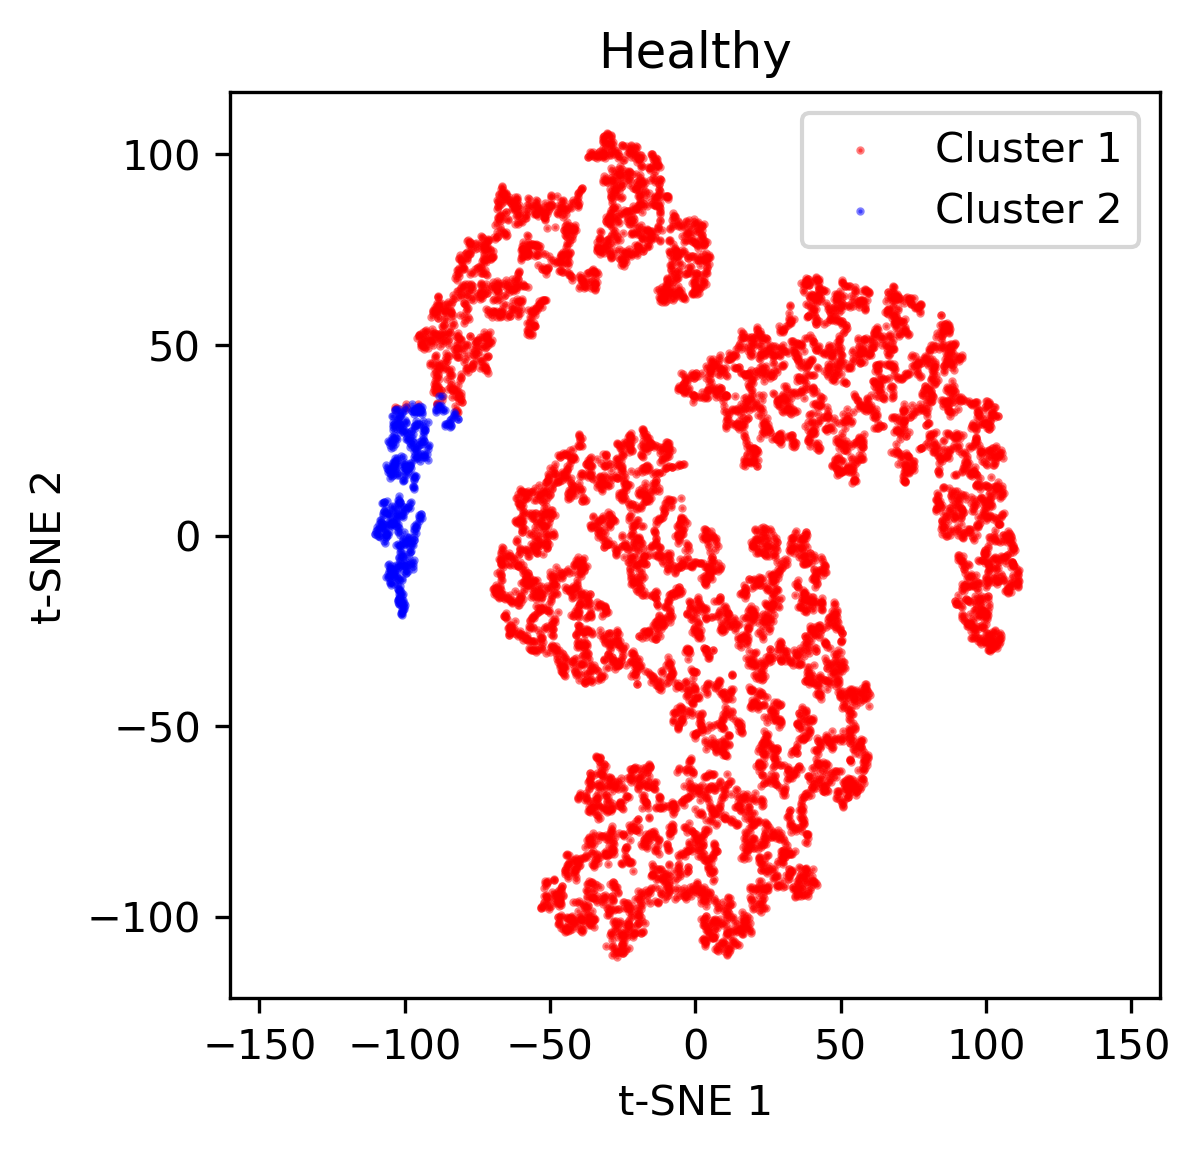

In [27]:
my_dpi = 300
plt.figure(figsize=(4, 4), dpi=my_dpi)
plt.scatter(X_healthy[h_idx_mbk == 0, 0], X_healthy[h_idx_mbk == 0, 1], s=1, c='r', alpha=0.5, label = 'Cluster 1')
plt.scatter(X_healthy[h_idx_mbk == 1, 0], X_healthy[h_idx_mbk == 1, 1], s=1, c='b', alpha=0.5, label = 'Cluster 2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Healthy')
plt.legend()
plt.xlim([-160, 160])
plt.savefig('healthy.png', dpi=my_dpi * 10)
plt.show()